In [1]:
#Import the library
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

#Load the data into the data frame
dataset = pd.read_csv('file:///Users/mac/Documents/Zindi/Train.csv')

In [2]:
dataset.head(10)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0
5,2bd9ab2983615149380a63f44a66780f4fa19a4a,THIES,K > 24 month,5500.0,9.0,5359.0,1786.0,19.0,6084.0,7.0,12.0,5.0,NaN,NaN,NO,30,"Data:490F=1GB,7d",7.0,0
6,b2d9c4bdceaafe305e8424c97f64e4ba880d0a97,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,7,NaN,NaN,0
7,8ebce4e82fa049f96ff1aa460217171af4e4ede1,SAINT-LOUIS,H 15-18 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,5,NaN,NaN,1
8,ebfbd28870a7663d49ec79799f9fd59e8c5655ed,TAMBACOUNDA,K > 24 month,22500.0,8.0,22230.0,7410.0,16.0,14956.0,6336.0,1017.0,185.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",3.0,0
9,cf5d5edda4805f7f526884cee8bde797213eeefa,NaN,G 12-15 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

In [4]:
#Show all of the column names
dataset.columns.values

array(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH',
       'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET',
       'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'MRG', 'REGULARITY',
       'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN'], dtype=object)

In [5]:
#Show statistics on the current data 
dataset.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


In [6]:
#Check for na or missing data
dataset.isna().sum()

user_id                0
REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
ZONE1             368310
ZONE2             374487
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

In [7]:
#Get the number of customers that churned
dataset['CHURN'].value_counts()

0    325156
1     74844
Name: CHURN, dtype: int64

<AxesSubplot:xlabel='CHURN', ylabel='count'>

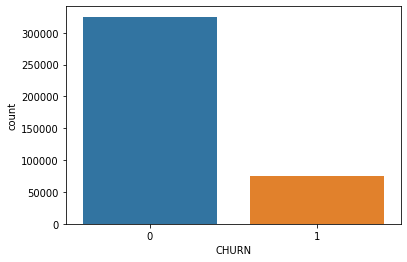

In [8]:
#Visualize the count of customer churn
sns.countplot(dataset['CHURN'])

<AxesSubplot:xlabel='TENURE', ylabel='count'>

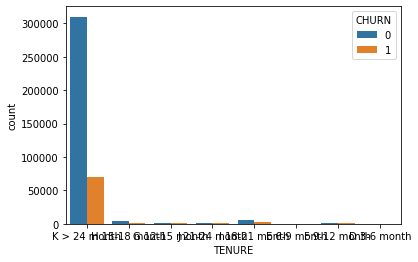

In [9]:
#Visualize the churn count for the Tenure
sns.countplot(x='TENURE', hue='CHURN', data = dataset)

<AxesSubplot:xlabel='MRG', ylabel='count'>

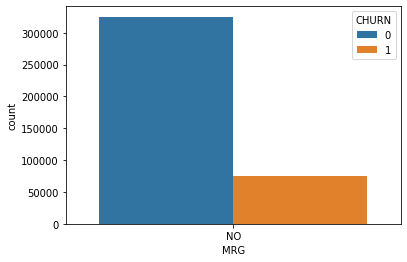

In [10]:
#Visualize the churn count for the MRG 
sns.countplot(x='MRG', hue='CHURN', data = dataset)

In [11]:
X = dataset.drop(labels='CHURN',axis=1)
Y = dataset.CHURN
print(X.shape, Y.shape)

(400000, 18) (400000,)


In [12]:
dataset['CHURN'].value_counts(1)

0    0.81289
1    0.18711
Name: CHURN, dtype: float64

In [13]:
dataset['CHURN'].value_counts(0)[0]

325156

In [14]:
dataset['CHURN'].value_counts(0)[1]

74844

In [15]:
retained = dataset['CHURN'].value_counts(0)[0]
CHURNed = dataset['CHURN'].value_counts(0)[1]

In [16]:
#Print the percentage of customers that stayed and left
print(retained /(retained + CHURNed) * 100 , "% of customers stayed with the company.")


#Print the percentage of customers that stayed and left
print(CHURNed /(retained + CHURNed) * 100,"% of customers left the company.")

81.289 % of customers stayed with the company.
18.711 % of customers left the company.


In [17]:
#Remove the unnecessary column customerID
cleaned_dataset = dataset = dataset.drop('user_id', axis=1)

In [18]:
#Look at the number of rows and cols in the new data set
cleaned_dataset.shape

(400000, 18)

In [19]:
#Perform One Hot Encoding using get-dummies method
cleaned_dataset = pd.get_dummies(dataset, columns = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK', 'CHURN'],
                         drop_first=True)

In [ ]:
#Perform Feature Scaling and One Hot Encoding
from sklearn.preprocessing import StandardScaler

#Perform Feature Scaling on 'Region', 'Tenure', 'MRG', 'TOP_PACK' in order to bring them on same scale.
StandardScaler = StandardScaler()
columns_for_ft_scaling = ['MRG', 'TOP_PACK']

#Apply the feature scaling operation on dataset using fit_transform() method
cleaned_dataset[columns_for_ft_scaling] = StandardScaler.fit_transform(cleaned_dataset[columns_for_ft_scaling])

In [ ]:
#Subset of values
cleaned_dataset.head() 

In [ ]:
#Scale the cleaned data [Create Feature varaible X and  Target variable y]
X = cleaned_dataset.drop('CHURN', 'user_id' axis = 1) 
y = cleaned_dataset['CHURN']

In [ ]:
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
#Create the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=42)

#Train the model
logmodel.fit(X_train, y_train)

#Predict the value for new, unseen data
pred = logmodel.predict(X_test)

#Find Accuracy using accuracy_score method
logmodel_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)

In [ ]:
#Fit The Support Vector Machine Model
from sklearn.svm import SVC
svcmodel = SVC(kernel='linear', random_state=42, probability=True)

#Train the model
svcmodel.fit(X_train, y_train)

#Predict the value for new, unseen data
svc_pred = svcmodel.predict(X_test)

#Find Accuracy using accuracy_score method
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)

In [ ]:
#Fit The K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p2 represents Euclidian distance, p1 represent

#Train the model
knnmodel.fit(X_train, y_train)

#Predict the value for new, unseen data
knn_pred = knnmodel.predict(X_test)

#Find Accuracy using accuracy_score method
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)

In [ ]:
#Fit The DecisionTreeClassifier Model
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criteron = 'gini', random_state=42) 
dtmodel.fit(X_train, y_train)

#Predict the value for new, unseen data
dt_pred = dtmodel.predict(X_test)

#Find Accuracy using accuracy_score method
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)

In [ ]:
#Fit The RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=42) 

#Train the model
rfmodel.fit(X_train, y_train)

#Predict the value for new, unseen data
rf_pred = rfmodel.predict(X_test)

#Find Accuracy using accuracy_score method
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)

In [ ]:
#Compare several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model' : ['LogisticRegression', 'KNeighborsClassifier’, ’SVC’, ‘DecisionTreeClassifier’, ‘RandomForestClassifier'],
    'Score' : [logmodel_accuracy, svc_accuracy, knn_accuracy, dt_accuracy, rf_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

In [ ]:
#Generate confusion matrix for logistics regression model
from sklearn.metric import confusion_matrix
conf_mat_logmodel = confusion_matrix(y-test, pred)
conf_mat_logmodel

In [ ]:
#Predict the probability of CHURN of each Customer
cleaned_dataset['Probability_of_CHURN'] = logmodel.predict_proba(cleaned_dataset[X_test.columns])[:,1]

In [ ]:
#Create a DateFrame showcasing probability of CHURN of each Customer
cleaned_dataset[['user_id', 'Probability_of_CHURN']].head()